In [1]:
from _utils import *

folder_path = '/mnt/home/tudomlumleart/ceph/05_Sox9Dataset/'
    
num_monomers = 80

# Load polys data and then perform linear interpolation
# List all .mat files in the folder and load them
cnc_polys = scipy.io.loadmat(folder_path + 'cncPols.mat')['cncPols'][:num_monomers, :, :]
esc_polys = scipy.io.loadmat(folder_path + 'escPols.mat')['escPols'][:num_monomers, :, :]

esc_polys_interp = interpolate_polymers(esc_polys)
cnc_polys_interp = interpolate_polymers(cnc_polys)

esc_maps_interp = np.array([squareform(pdist(esc_polys_interp[:80, :, i])) for i in range(esc_polys_interp.shape[2])])
cnc_maps_interp = np.array([squareform(pdist(cnc_polys_interp[:80, :, i])) for i in range(cnc_polys_interp.shape[2])])
esc_maps_interp_flat = np.array([x.flatten() for x in esc_maps_interp])
cnc_maps_interp_flat = np.array([x.flatten() for x in cnc_maps_interp])
all_maps_interp = np.concatenate((esc_maps_interp, cnc_maps_interp), axis=0)
all_maps_interp_flat = np.concatenate((esc_maps_interp_flat, cnc_maps_interp_flat), axis=0)


2024-09-05 21:30:30.910518: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-05 21:30:31.365992: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX512F AVX512_VNNI, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:

from sklearn.random_projection import GaussianRandomProjection
rp = GaussianRandomProjection(n_components=2, compute_inverse_components=True)

In [4]:
rp.fit(all_maps_interp_flat)
esc_maps_rp = rp.transform(esc_maps_interp_flat)
cnc_maps_rp = rp.transform(cnc_maps_interp_flat)

In [7]:
esc_df = pd.DataFrame(esc_maps_rp, columns=['x1', 'x2'])
esc_df['label'] = 'ESC'
cnc_df = pd.DataFrame(cnc_maps_rp, columns=['x1', 'x2'])
cnc_df['label'] = 'CNC'
all_df = pd.concat([esc_df, cnc_df])

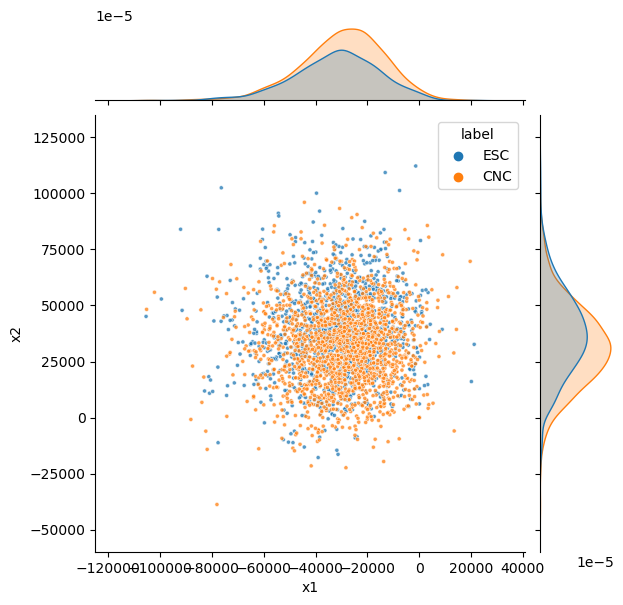

In [9]:
sns.jointplot(x='x1', y='x2', data=all_df, marker='.', hue='label', alpha=0.75)
# plt.savefig(save_dir + 'pca_2d.png', dpi=300, bbox_inches='tight')

In [ ]:
# Random projection produces the distribution that is very similar to PCA